#  Atividades previstas para este Notebook:
> 1. Carregar a tabela **olist_ibge_under_sampled_20**  

> 2. Ajustá-lo para ter um modelo aplicado a si.  


> 3. Aplicar o modelo Gradient Boosting.  

> 4. Com as variáveis selecionadas conforme o título do notebook

##  1 - Importação de bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = 100


## 2 - Importação da tabela <font color=red>'olist_ibge_under_sampled_20'</font> 

In [2]:
olist_ibge_under_sampled_ruido = pd.read_excel('olist_ibge_under_sampled_20.xlsx', sheet_name = "Sheet1", header = 0, index_col=None) # sem dtype = 'object'

In [3]:
olist_ibge_under_sampled_ruido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34481 entries, 0 to 34480
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                34481 non-null  int64  
 1   qtde_credit_card          34481 non-null  int64  
 2   qtde_debit_card           34481 non-null  int64  
 3   qtde_voucher              34481 non-null  int64  
 4   soma_payment              34481 non-null  float64
 5   qtde_installments         34481 non-null  int64  
 6   AR_MUN_2018               34481 non-null  float64
 7   PIB                       34481 non-null  float64
 8   gini                      34481 non-null  float64
 9   dias                      34481 non-null  float64
 10  humor                     34481 non-null  int64  
 11  le_product_id             34481 non-null  int64  
 12  le_seller_id              34481 non-null  int64  
 13  le_product_category_name  34481 non-null  int64  
 14  le_sig

### 2.1 - Deletar a coluna  <font color=red>'Unnamed: 0'</font>  
> Ela é um ruído que sempre surge ao importarmos um arquivo para um DataFrame

In [4]:
olist_ibge_under_sampled = olist_ibge_under_sampled_ruido.drop(['Unnamed: 0'], axis=1)

In [5]:
olist_ibge_under_sampled.shape, olist_ibge_under_sampled_ruido.shape

((34481, 15), (34481, 16))

In [6]:
olist_ibge_under_sampled.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,1,0,0,26.85,1,290.60,"3,856,232.73",0.86,5.17,1,20461,2340,44,25,21
1,1,0,0,33.10,3,331.40,"88,277,462.53",0.86,9.12,1,7773,371,70,10,21
2,1,0,0,83.23,8,869.44,"450,930.71",0.75,14.29,1,27842,2850,59,7,21
3,1,0,0,33.34,1,"1,521.11","687,035,889.61",0.90,3.89,1,25451,459,49,25,21
4,1,0,0,233.69,10,"1,200.26","329,431,359.90",0.78,11.45,1,9247,2161,30,18,21


In [7]:
olist_ibge_under_sampled.isna().sum()

qtde_credit_card            0
qtde_debit_card             0
qtde_voucher                0
soma_payment                0
qtde_installments           0
AR_MUN_2018                 0
PIB                         0
gini                        0
dias                        0
humor                       0
le_product_id               0
le_seller_id                0
le_product_category_name    0
le_sigla_state              0
le_seller_sigla_state       0
dtype: int64

### Separar as explicativas da variável 'target' (variável alvo, a ser prevista).

In [8]:
explicativas = olist_ibge_under_sampled.drop(columns=['humor'])
target = olist_ibge_under_sampled['humor']

In [9]:
explicativas.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,1,0,0,26.85,1,290.60,"3,856,232.73",0.86,5.17,20461,2340,44,25,21
1,1,0,0,33.10,3,331.40,"88,277,462.53",0.86,9.12,7773,371,70,10,21
2,1,0,0,83.23,8,869.44,"450,930.71",0.75,14.29,27842,2850,59,7,21
3,1,0,0,33.34,1,"1,521.11","687,035,889.61",0.90,3.89,25451,459,49,25,21
4,1,0,0,233.69,10,"1,200.26","329,431,359.90",0.78,11.45,9247,2161,30,18,21


In [10]:
explicativas.dtypes

qtde_credit_card              int64
qtde_debit_card               int64
qtde_voucher                  int64
soma_payment                float64
qtde_installments             int64
AR_MUN_2018                 float64
PIB                         float64
gini                        float64
dias                        float64
le_product_id                 int64
le_seller_id                  int64
le_product_category_name      int64
le_sigla_state                int64
le_seller_sigla_state         int64
dtype: object

In [11]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: humor, dtype: int64

## Criação de dataframe com variaveis selecionadas  
> Todas as variáveis selecionadas, exceto as de alta cardinalidade.

In [12]:
# Rodaremos os modelos com 05 (cinco) variáveis explicativas
# Aquelas que foram mais votadas.
expl = explicativas[['qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment', 'qtde_installments', 'AR_MUN_2018', 'PIB', 'gini', 'dias', 'le_product_id', 'le_seller_id', 'le_product_category_name', 'le_sigla_state', 'le_seller_sigla_state']]

expl.head()


,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,1,0,0,26.85,1,290.60,"3,856,232.73",0.86,5.17,20461,2340,44,25,21
1,1,0,0,33.10,3,331.40,"88,277,462.53",0.86,9.12,7773,371,70,10,21
2,1,0,0,83.23,8,869.44,"450,930.71",0.75,14.29,27842,2850,59,7,21
3,1,0,0,33.34,1,"1,521.11","687,035,889.61",0.90,3.89,25451,459,49,25,21
4,1,0,0,233.69,10,"1,200.26","329,431,359.90",0.78,11.45,9247,2161,30,18,21


In [13]:
expl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34481 entries, 0 to 34480
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   qtde_credit_card          34481 non-null  int64  
 1   qtde_debit_card           34481 non-null  int64  
 2   qtde_voucher              34481 non-null  int64  
 3   soma_payment              34481 non-null  float64
 4   qtde_installments         34481 non-null  int64  
 5   AR_MUN_2018               34481 non-null  float64
 6   PIB                       34481 non-null  float64
 7   gini                      34481 non-null  float64
 8   dias                      34481 non-null  float64
 9   le_product_id             34481 non-null  int64  
 10  le_seller_id              34481 non-null  int64  
 11  le_product_category_name  34481 non-null  int64  
 12  le_sigla_state            34481 non-null  int64  
 13  le_seller_sigla_state     34481 non-null  int64  
dtypes: flo

# Separação em treino e teste

In [14]:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(expl,
                                                       target,
                                                       test_size=0.3,
                                                       random_state=196)

# Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

## Gradient Boosting - simplificado

In [15]:
#1
gb_dict = {"criterion": ["friedman_mse",  "mae"],
    'random_state': [1967]
}

In [16]:
gb_dict

{'criterion': ['friedman_mse', 'mae'], 'random_state': [1967]}

In [17]:
#2
from sklearn.model_selection import GridSearchCV

In [18]:
#3
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

In [19]:
gb

GradientBoostingClassifier(random_state=42)

In [20]:
gb_grid = GridSearchCV(estimator=gb,       # parametro a ser utilizado. No caso, Gradient Boosting
                      param_grid=gb_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)               # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)

In [21]:
gb_grid

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'random_state': [1967]},
             scoring='accuracy')

In [22]:
#4
gb_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'random_state': [1967]},
             scoring='accuracy')

In [23]:
#5
gb_grid.best_params_

{'criterion': 'friedman_mse', 'random_state': 1967}

In [24]:
gb_grid.best_score_

0.62251311677873

##  Importação da biblioteca - cálculo da acurácia

In [25]:
from sklearn.metrics import accuracy_score

## Acurácia de treino - Gradient Boosting

In [26]:
gb_grid.best_score_

0.62251311677873

In [27]:
acc_gb_treino = accuracy_score(y_treino, 
                              gb_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_treino))
acc_gb_treino

0.6491133576400397

##  Acurácia de teste - Gradient Boosting
A acurácia de teste está muito próxima à acurácia de treino, o que mostra que o modelo está perfomando bem.

In [28]:
acc_gb_teste = accuracy_score(y_teste, 
                              gb_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_teste))
acc_gb_teste

0.616143064282262

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_treino,gb_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70     13977
           1       0.59      0.55      0.57     10159

    accuracy                           0.65     24136
   macro avg       0.64      0.64      0.64     24136
weighted avg       0.65      0.65      0.65     24136



In [31]:
print(classification_report(y_teste,gb_grid.predict(x_teste)))
print ("A acurácia da previsão é ", accuracy_score(y_teste,gb_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5891
           1       0.56      0.52      0.54      4454

    accuracy                           0.62     10345
   macro avg       0.61      0.60      0.61     10345
weighted avg       0.61      0.62      0.61     10345

A acurácia da previsão é  0.616143064282262


In [32]:
#matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_teste, gb_grid.predict(x_teste))

In [33]:
#matriz de confusão
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


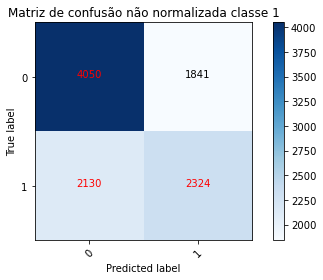

In [34]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão não normalizada classe 1', normalize=False)

In [35]:
tn = cnf_matrix[0,0]
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0] 
fp = cnf_matrix[0,1]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [36]:
print (recall)
print (precisão)
print (accuracy)

0.5217781769196228
0.5579831932773109
0.616143064282262


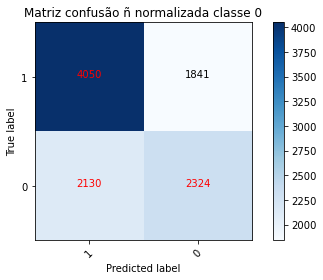

In [37]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['1', '0'],
                      title='Matriz confusão ñ normalizada classe 0', normalize=False)

In [38]:
tn = cnf_matrix[1,1]
tp = cnf_matrix[0,0]
fn = cnf_matrix[0,1] 
fp = cnf_matrix[1,0]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

### Complementação Mário - Matriz de Confusão, Sensibilidade, Especificidade e Feature_importances

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
cm1 = confusion_matrix(y_true= y_teste,
                       y_pred= gb_grid.predict(x_teste))
cm1

array([[4050, 1841],
       [2130, 2324]], dtype=int64)

In [41]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [42]:
print('Gradient Boosting')
print('===================================================')
print('O  recall  da  classe  0  é   : %.2f ' % recall)
print ('A  precisão  da classe 0  é   : %.2f '% precisão)
print ('A  ACURÁCIA DA  PREVISÃO   é  : %.2f '% accuracy)
print('A sensitibilidade da classe 0 : %.2f'% sensitivity1 )
print('A especificidade da classe 0  : %.2f'% specificity1)

Gradient Boosting
O  recall  da  classe  0  é   : 0.69 
A  precisão  da classe 0  é   : 0.66 
A  ACURÁCIA DA  PREVISÃO   é  : 0.62 
A sensitibilidade da classe 0 : 0.69
A especificidade da classe 0  : 0.52


In [43]:
gb_grid.best_estimator_.feature_importances_

array([3.78851184e-04, 7.46976490e-04, 3.59586088e-03, 4.07832625e-02,
       3.92811914e-03, 2.08913283e-02, 3.59223341e-02, 6.20911441e-03,
       7.58861600e-01, 1.86005188e-02, 3.73297688e-02, 2.44223747e-02,
       2.55004777e-02, 2.28294136e-02])

In [45]:
a=pd.concat([pd.Series(x_teste.columns), pd.Series(gb_grid.best_estimator_.feature_importances_)], axis=1)

In [46]:
print('Feature Importance')
a

Feature Importance


,0,1
0,qtde_credit_card,0.00
1,qtde_debit_card,0.00
2,qtde_voucher,0.00
3,soma_payment,0.04
4,qtde_installments,0.00
5,AR_MUN_2018,0.02
6,PIB,0.04
7,gini,0.01
8,dias,0.76
9,le_product_id,0.02


In [47]:
a.sort_values(by=1, ascending=False)

,0,1
8,dias,0.76
3,soma_payment,0.04
10,le_seller_id,0.04
6,PIB,0.04
12,le_sigla_state,0.03
11,le_product_category_name,0.02
13,le_seller_sigla_state,0.02
5,AR_MUN_2018,0.02
9,le_product_id,0.02
7,gini,0.01


In [44]:
# logistic regression for feature importance
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot
# define dataset
# # X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
# # model = LogisticRegression()
# fit the model
# # model.fit(X, y)
# get importance
# lr_grid.fit(x_treino, y_treino)
# importance = lr_grid.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()